In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import sys
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from nets import *
from cfgs import *
from data import *
from clip_ops.clip_ops import *
from trainer import *

In [2]:
%matplotlib inline
save_plot = True
plt.rcParams.update({'font.size': 10, 'axes.labelsize': 'x-large'})
D = 201

x = np.linspace(0, 1.0, D)
X_tst = np.stack([v.flatten() for v in np.meshgrid(x,x)], axis = -1)
X_tst = np.expand_dims(X_tst, 1)
X_tst  = X_tst + 2.0
print(X_tst.shape)

cfg = unit_1x2_uniform_23_config.cfg
cfg.test.num_misreports = 1
cfg.test.gd_iter = 0
cfg.test.batch_size = D
cfg.test.num_batches = int(X_tst.shape[0]/cfg.test.batch_size)
cfg.test.save_output = True

(40401, 1, 2)


In [3]:
Net = unit_net.Net
Generator = uniform_23_generator.Generator
clip_op_lambda = (lambda x: clip_op_23(x))
Trainer = trainer.Trainer

In [4]:
net = Net(cfg)
generator = Generator(cfg, 'test', X_tst)
clip_op_lambda = (lambda x: tf.assign(x, tf.clip_by_value(x, 0.0, 1.0)))
m = Trainer(cfg, "test", net, clip_op_lambda)
m.test(generator)

INFO:tensorflow:Restoring parameters from experiments/unit_1x2_uniform_23/model-400000


2019-02-02 23:11:51,424:INFO:Restoring parameters from experiments/unit_1x2_uniform_23/model-400000
2019-02-02 23:12:01,899:INFO:TEST BATCH-0: t = 10.3224, Revenue: 1.784158, Regret: 0.000001, IRP: 0.000000
2019-02-02 23:12:01,909:INFO:TEST BATCH-1: t = 10.3277, Revenue: 1.791996, Regret: 0.000000, IRP: 0.000000
2019-02-02 23:12:01,917:INFO:TEST BATCH-2: t = 10.3327, Revenue: 1.799996, Regret: 0.000000, IRP: 0.000000
2019-02-02 23:12:01,926:INFO:TEST BATCH-3: t = 10.3376, Revenue: 1.808144, Regret: 0.000001, IRP: 0.000000
2019-02-02 23:12:01,934:INFO:TEST BATCH-4: t = 10.3424, Revenue: 1.816426, Regret: 0.000000, IRP: 0.000000
2019-02-02 23:12:01,942:INFO:TEST BATCH-5: t = 10.3471, Revenue: 1.824825, Regret: 0.000001, IRP: 0.000000
2019-02-02 23:12:01,950:INFO:TEST BATCH-6: t = 10.3518, Revenue: 1.833327, Regret: 0.000001, IRP: 0.000000
2019-02-02 23:12:01,958:INFO:TEST BATCH-7: t = 10.3564, Revenue: 1.841917, Regret: 0.000000, IRP: 0.000000
2019-02-02 23:12:01,965:INFO:TEST BATCH-8: t

2019-02-02 23:12:02,463:INFO:TEST BATCH-76: t = 10.6655, Revenue: 2.161378, Regret: 0.000000, IRP: 0.000000
2019-02-02 23:12:02,470:INFO:TEST BATCH-77: t = 10.6699, Revenue: 2.161275, Regret: 0.000000, IRP: 0.000000
2019-02-02 23:12:02,477:INFO:TEST BATCH-78: t = 10.6743, Revenue: 2.161176, Regret: 0.000000, IRP: 0.000000
2019-02-02 23:12:02,484:INFO:TEST BATCH-79: t = 10.6788, Revenue: 2.161082, Regret: 0.000000, IRP: 0.000000
2019-02-02 23:12:02,491:INFO:TEST BATCH-80: t = 10.6832, Revenue: 2.160993, Regret: 0.000000, IRP: 0.000000
2019-02-02 23:12:02,498:INFO:TEST BATCH-81: t = 10.6876, Revenue: 2.160912, Regret: 0.000000, IRP: 0.000000
2019-02-02 23:12:02,505:INFO:TEST BATCH-82: t = 10.6922, Revenue: 2.160840, Regret: 0.000000, IRP: 0.000000
2019-02-02 23:12:02,512:INFO:TEST BATCH-83: t = 10.6966, Revenue: 2.160777, Regret: 0.000002, IRP: 0.000000
2019-02-02 23:12:02,520:INFO:TEST BATCH-84: t = 10.7017, Revenue: 2.160725, Regret: 0.000001, IRP: 0.000000
2019-02-02 23:12:02,527:INFO

2019-02-02 23:12:02,878:INFO:TEST BATCH-152: t = 10.9422, Revenue: 2.191282, Regret: 0.000001, IRP: 0.000000
2019-02-02 23:12:02,883:INFO:TEST BATCH-153: t = 10.9452, Revenue: 2.192073, Regret: 0.000002, IRP: 0.000000
2019-02-02 23:12:02,887:INFO:TEST BATCH-154: t = 10.9483, Revenue: 2.192869, Regret: 0.000000, IRP: 0.000000
2019-02-02 23:12:02,892:INFO:TEST BATCH-155: t = 10.9512, Revenue: 2.193669, Regret: 0.000001, IRP: 0.000000
2019-02-02 23:12:02,897:INFO:TEST BATCH-156: t = 10.9548, Revenue: 2.194474, Regret: 0.000000, IRP: 0.000000
2019-02-02 23:12:02,903:INFO:TEST BATCH-157: t = 10.9583, Revenue: 2.195285, Regret: 0.000001, IRP: 0.000000
2019-02-02 23:12:02,908:INFO:TEST BATCH-158: t = 10.9616, Revenue: 2.196099, Regret: 0.000001, IRP: 0.000000
2019-02-02 23:12:02,912:INFO:TEST BATCH-159: t = 10.9646, Revenue: 2.196918, Regret: 0.000001, IRP: 0.000000
2019-02-02 23:12:02,917:INFO:TEST BATCH-160: t = 10.9678, Revenue: 2.197741, Regret: 0.000000, IRP: 0.000000
2019-02-02 23:12:02

In [5]:
alloc = np.load(cfg.dir_name + "/alloc_tst_400000.npy").reshape(D,D,2)
pay = np.load(cfg.dir_name + "/pay_tst_400000.npy").reshape(D,D,1)

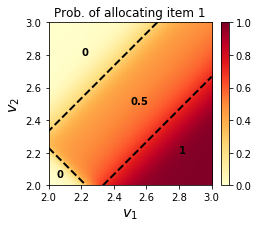

In [6]:
x1 = 4.0/3.0 + np.sqrt(4.0 + 3.0/2.0)/3.0
points1 = [(3.0 - 1.0/3.0, 3.0), (2.0, 2.0 + 1.0/3.0)]                    
points2 = [(2.0, 2 * x1 - 2.0), (2 * x1 - 2.0, 2.0)]                 
points3 = [(2.0 + 1.0/3.0, 2.0), (3.0, 3.0 - 1.0/3.0)]

x_1 = list(map(lambda x: x[0], points1))
y_1 = list(map(lambda x: x[1], points1))
x_2 = list(map(lambda x: x[0], points2))
y_2 = list(map(lambda x: x[1], points2))
x_3 = list(map(lambda x: x[0], points3))
y_3 = list(map(lambda x: x[1], points3))

plt.rcParams.update({'font.size': 10, 'axes.labelsize': 'x-large'})
fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize = (8,6))
ax.plot(x_1, y_1, linewidth = 2, linestyle = '--', color='black')
ax.plot(x_2, y_2, linewidth = 2, linestyle = '--', color='black')
ax.plot(x_3, y_3, linewidth = 2, linestyle = '--', color='black')
img = ax.imshow(alloc[::-1, :, 0], extent=[2,3,2,3], vmin = 0.0, vmax=1.0, cmap = 'YlOrRd')

plt.text(2.2, 2.8, s='0', color='black', fontsize='10', fontweight='bold')
plt.text(2.05, 2.05, s='0', color='black', fontsize='10', fontweight='bold')
plt.text(2.5, 2.5, s='0.5', color='black', fontsize='10', fontweight='bold')
plt.text(2.8, 2.2, s='1', color='black', fontsize='10', fontweight='bold')
                    
ax.set_xlabel('$v_1$')
ax.set_ylabel('$v_2$')
plt.title('Prob. of allocating item 1')

_ = plt.colorbar(img, fraction=0.046, pad=0.04)
if save_plot:
    fig.set_size_inches(4, 3)
    plt.savefig(os.path.join(cfg.dir_name, 'alloc1.pdf'), bbox_inches = 'tight', pad_inches = 0.05)

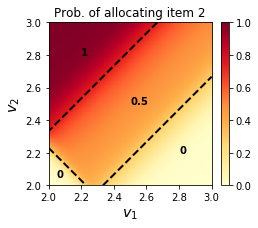

In [7]:
x1 = 4.0/3.0 + np.sqrt(4.0 + 3.0/2.0)/3.0
points1 = [(3.0 - 1.0/3.0, 3.0), (2.0, 2.0 + 1.0/3.0)]
points2 = [(2.0, 2 * x1 - 2.0), (2 * x1 - 2.0, 2.0)]
points3 = [(2.0 + 1.0/3.0, 2.0), (3.0, 3.0 - 1.0/3.0)]

x_1 = list(map(lambda x: x[0], points1))
y_1 = list(map(lambda x: x[1], points1))
x_2 = list(map(lambda x: x[0], points2))
y_2 = list(map(lambda x: x[1], points2))
x_3 = list(map(lambda x: x[0], points3))
y_3 = list(map(lambda x: x[1], points3))

plt.rcParams.update({'font.size': 10, 'axes.labelsize': 'x-large'})
fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize = (8,6))

ax.plot(x_1, y_1, linewidth = 2, linestyle = '--', color='black')
ax.plot(x_2, y_2, linewidth = 2, linestyle = '--', color='black')
ax.plot(x_3, y_3, linewidth = 2, linestyle = '--', color='black')
img = ax.imshow(alloc[::-1, :, 1], extent=[2,3,2,3], vmin = 0.0, vmax=1.0, cmap = 'YlOrRd')

plt.text(2.2, 2.8, s='1', color='black', fontsize='10', fontweight='bold')
plt.text(2.05, 2.05, s='0', color='black', fontsize='10', fontweight='bold')
plt.text(2.5, 2.5, s='0.5', color='black', fontsize='10', fontweight='bold')
plt.text(2.8, 2.2, s='0', color='black', fontsize='10', fontweight='bold')
                    
ax.set_xlabel('$v_1$')
ax.set_ylabel('$v_2$')
plt.title('Prob. of allocating item 2')

_ = plt.colorbar(img, fraction=0.046, pad=0.04)
if save_plot:
    fig.set_size_inches(4, 3)
    plt.savefig(os.path.join(cfg.dir_name, 'alloc2.pdf'), bbox_inches = 'tight', pad_inches = 0.05)